In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.3.1


In [2]:
#Loading the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#Rescaling, ie. normalising the pixel values of the images to the range 0 to 1
train_images=train_images/255.0
test_images=test_images/255.0

# Task 1 - writing a function that adds noise to MNIST images

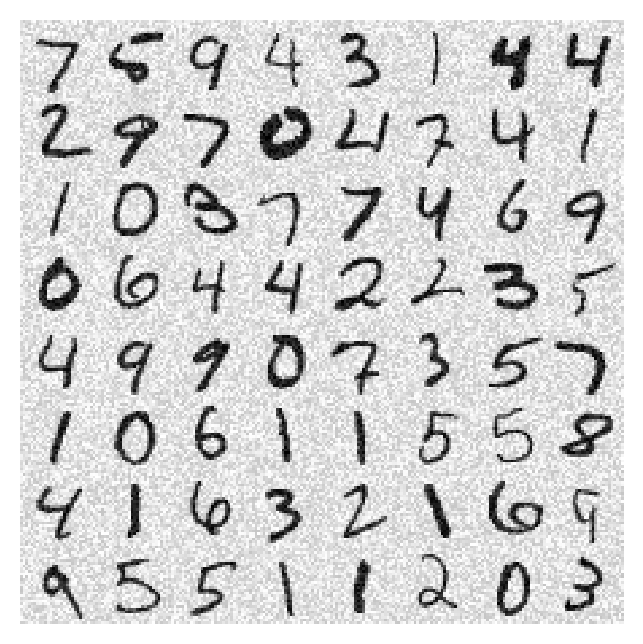

In [18]:
def make_noisy(image,y_noise):
    
    '''
This function adds a random noise contribution to each pixel in the image or set of images on which the funciton is called.
The random noise is drawn from a uniform distribution from 0 to y_noise.

Inputs: 
image - the image or set of images to which the noise is to be added. 
y_noise - a configurable parameter that determines the level of noise added to the images.

Outputs:
noisy_image - the input image with noise added.

    '''
    pixel_noise = np.random.uniform(low=0,high=y_noise,size=image.shape)
    noisy_image = np.add(image,pixel_noise)
    return noisy_image



'''Checking that the make_noisy function works: '''

# Defining a function to display multiple images:
def display_image_array(whichImg,imageset):    
    '''
    displays arrays of images.
    the parameter whichImg sets how many images are to be displayed
    the parameter imageset allows the function to be called on any set of images
    '''
    numcols=int(math.sqrt(len(whichImg)))
    if numcols*numcols < len(whichImg):
        numcols=numcols+1
    BigImage=np.zeros([28*numcols,28*numcols])
    for j in range(len(whichImg)):
        x=(j%numcols)*28
        y=int(j/numcols)*28
        BigImage[x:x+28,y:y+28]=imageset[whichImg[j]]
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.axis('off')
    plt.show()

# Displaying the first 64 of the test images, with noise added (y_noise=0.3)
display_image_array(range(64),make_noisy(test_images,0.3))

# Task 2 - training a NN on the MNIST dataset

In [5]:
# setting up the layers in the sequential network:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [6]:
# compiling the network:

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

# the loss function is the SparseCategoricalCrossentropy function
# the optimiser is the stochastic gradient descent method, with a learning rate of 1
# the training and testing steps are monitored using the 'accuracy' metric (the fraction of images correctly classified)

In [7]:
# training the model:

history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8950
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1348 - accuracy: 0.9588
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9687
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9772
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9806
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9832
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0485 - accuracy: 0.9850
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9872
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0339 - accuracy: 0.9888

In [8]:
# testing the performance

test_loss, test_acc_0 = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy ynoise=0:', test_acc_0)

313/313 - 0s - loss: 0.1160 - accuracy: 0.9781

Test accuracy ynoise=0: 0.9781000018119812


# Task 3 - running the network on the noisy images

313/313 - 0s - loss: 0.1160 - accuracy: 0.9781
313/313 - 0s - loss: 0.1151 - accuracy: 0.9780
313/313 - 0s - loss: 0.1163 - accuracy: 0.9764
313/313 - 0s - loss: 0.1208 - accuracy: 0.9746
313/313 - 0s - loss: 0.1281 - accuracy: 0.9728
313/313 - 0s - loss: 0.1389 - accuracy: 0.9696
313/313 - 0s - loss: 0.1526 - accuracy: 0.9666
313/313 - 0s - loss: 0.1727 - accuracy: 0.9621
313/313 - 0s - loss: 0.1992 - accuracy: 0.9564
313/313 - 0s - loss: 0.2384 - accuracy: 0.9453
313/313 - 0s - loss: 0.2933 - accuracy: 0.9292
313/313 - 0s - loss: 0.3545 - accuracy: 0.9107
313/313 - 0s - loss: 0.4431 - accuracy: 0.8936
313/313 - 0s - loss: 0.5235 - accuracy: 0.8722
313/313 - 0s - loss: 0.6401 - accuracy: 0.8523
313/313 - 0s - loss: 0.7510 - accuracy: 0.8278
313/313 - 0s - loss: 0.8721 - accuracy: 0.8062
313/313 - 0s - loss: 1.0086 - accuracy: 0.7831
313/313 - 0s - loss: 1.1462 - accuracy: 0.7646
313/313 - 0s - loss: 1.2713 - accuracy: 0.7455
313/313 - 0s - loss: 1.4154 - accuracy: 0.7253
313/313 - 0s 

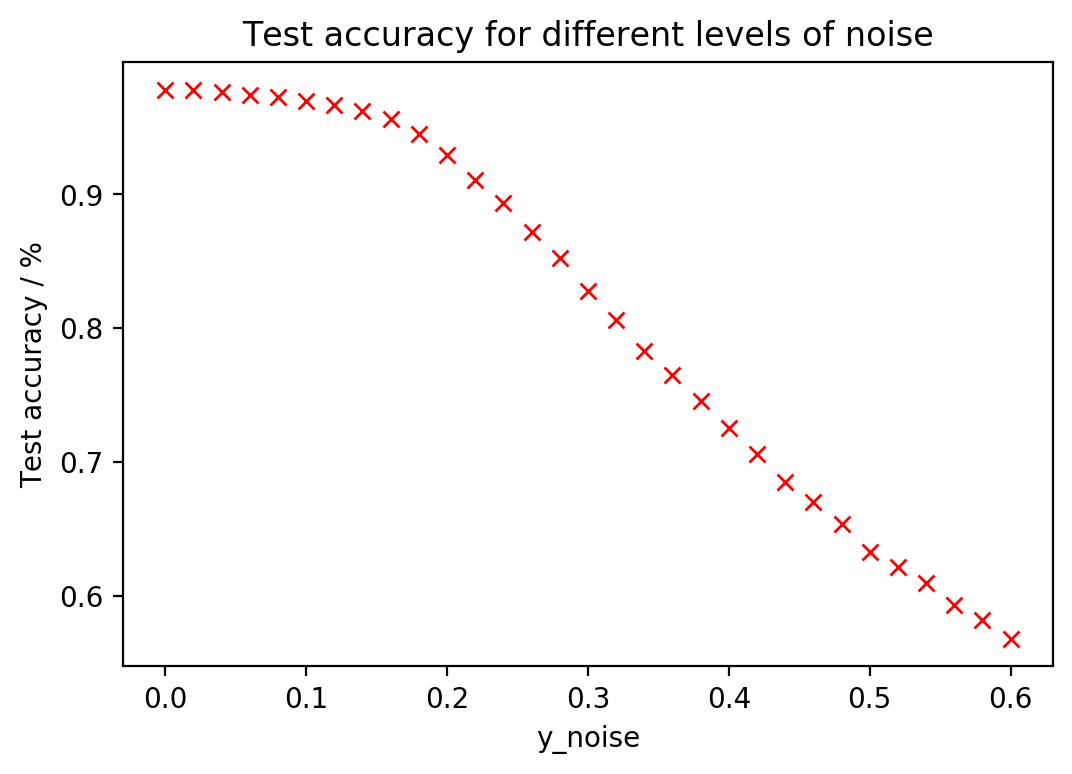

In [9]:
# setting up an array of y_noise values:
y_noise=np.linspace(0,0.6,31)

# creating a figure for plotting:
plt.figure()
plt.title('Test accuracy for different levels of noise')
plt.xlabel('y_noise')
plt.ylabel('Test accuracy / %')

# running the model on the training dataset, each time increasing the level of noise added to the images
# then plotting the results, ie. plotting the upper limit of the unifrom distribution from which the pixel noise values are randomly selected, against the classification accuracy
for a in y_noise:
    test_loss, test_acc = model.evaluate(make_noisy(test_images,a),  test_labels, verbose=2)
    plt.plot(a,test_acc,'rx')

# Task 4 - retraining NN using noisy training sample and redoing task3

In [10]:
# retraining the model using the training images with y_noise=0.3

history=model.fit(make_noisy(train_images,0.05), train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 8.8950e-04 - accuracy: 1.0000
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 7.4735e-04 - accuracy: 1.0000
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 6.9567e-04 - accuracy: 1.0000
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 6.3254e-04 - accuracy: 1.0000
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 5.9813e-04 - accuracy: 1.0000
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 5.6725e-04 - accuracy: 1.0000
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 5.3065e-04 - accuracy: 1.0000
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 5.1864e-04 - accuracy: 1.0000
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 4.9014e-04 - accuracy: 1.0000
Epoch 10/30
600/600 [==============================] - 1s 2ms/st

313/313 - 0s - loss: 0.1372 - accuracy: 0.9778
313/313 - 0s - loss: 0.1319 - accuracy: 0.9777
313/313 - 0s - loss: 0.1294 - accuracy: 0.9789
313/313 - 0s - loss: 0.1285 - accuracy: 0.9784
313/313 - 0s - loss: 0.1312 - accuracy: 0.9772
313/313 - 0s - loss: 0.1328 - accuracy: 0.9759
313/313 - 0s - loss: 0.1384 - accuracy: 0.9740
313/313 - 0s - loss: 0.1447 - accuracy: 0.9716
313/313 - 0s - loss: 0.1630 - accuracy: 0.9689
313/313 - 0s - loss: 0.1735 - accuracy: 0.9666
313/313 - 0s - loss: 0.1996 - accuracy: 0.9609
313/313 - 0s - loss: 0.2276 - accuracy: 0.9546
313/313 - 0s - loss: 0.2677 - accuracy: 0.9432
313/313 - 0s - loss: 0.3194 - accuracy: 0.9316
313/313 - 0s - loss: 0.3770 - accuracy: 0.9183
313/313 - 0s - loss: 0.4639 - accuracy: 0.9017
313/313 - 0s - loss: 0.5570 - accuracy: 0.8846
313/313 - 0s - loss: 0.6702 - accuracy: 0.8649
313/313 - 0s - loss: 0.7713 - accuracy: 0.8469
313/313 - 0s - loss: 0.8890 - accuracy: 0.8283
313/313 - 0s - loss: 1.0269 - accuracy: 0.8036
313/313 - 0s 

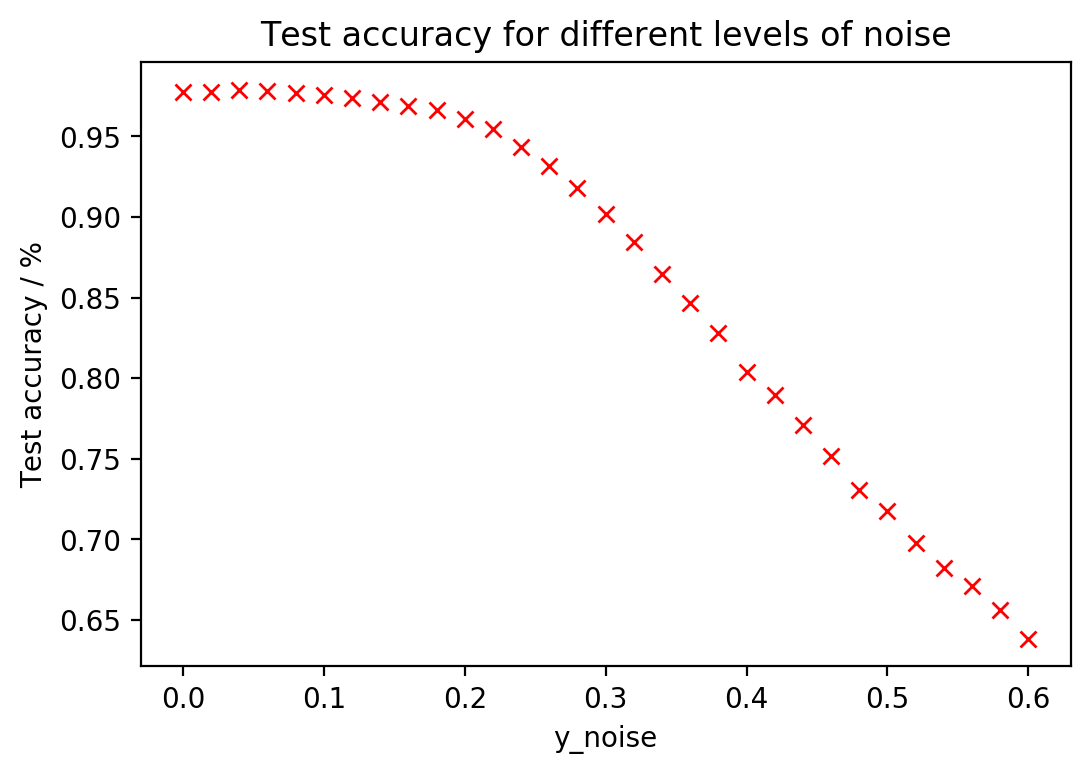

In [11]:
'''Running the retrained model on test images with varying levels of noise'''
# setting up an array of y_noise values for testing:
y_noise=np.linspace(0,0.6,31)

# creating a figure for plotting:
plt.figure()
plt.title('Test accuracy for different levels of noise')
plt.xlabel('y_noise')
plt.ylabel('Test accuracy / %')

# running the model on the training dataset, each time increasing the level of noise added to the images
# then plotting the results, ie. plotting the upper limit of the unifrom distribution from which the pixel noise values are randomly selected, against the classification accuracy
for a in y_noise:
    test_loss, test_acc = model.evaluate(make_noisy(test_images,a),  test_labels, verbose=2)
    plt.plot(a,test_acc,'rx')

# Task 5 - determining optimum level of noise added to training samples to maximise performance

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8762
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9502
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9621
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9686
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9720
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9739
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9774
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9791
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9829

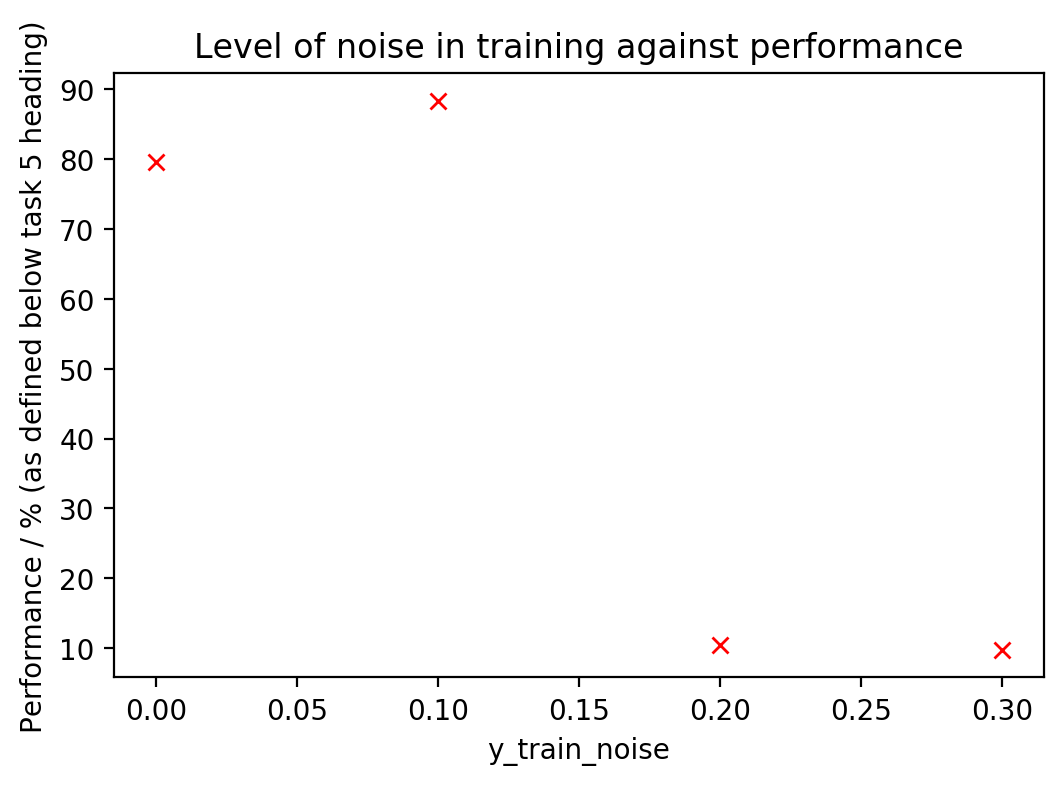

In [20]:
''' 
Let performance be defined to be proportional to the sum of the test accuracies over the y_noise values.
Then the maximum possible perforamnce would be 31, which would arise from a obtaining an accuracy of 1 for all 31 y_noise values applied to the training data. 
The performance metric used below is the percentage of this maximum possible performance achieved by each of the models. 
'''

#setting up a list of y_noise values to be applied to the training dataset
y_train_noise = (0,0.1,0.2,0.3)

# setting up an array of y_noise values for testing:
y_noise=np.linspace(0,0.6,31)

# creating a figure for plotting:
plt.figure()
plt.title('Level of noise in training against performance')
plt.xlabel('y_train_noise')
plt.ylabel('Performance / % (as defined below task 5 heading)')


# Setting up a network, training for each value of y_train_noise, and testing each of these on a range of y_noise values applied to the testing set.
# Then evaluating performance of each network, and plotting.

for a in y_train_noise:
    # setting up the layers in the sequential network:
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10)
    ])
    # compiling the network:
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
                  metrics=['accuracy'])

        # the loss function is the SparseCategoricalCrossentropy function
        # the optimiser is the stochastic gradient descent method, with a learning rate of 1
        # the training and testing steps are monitored using the 'accuracy' metric (the fraction of images correctly classified)
    
    # retraining the model using the training images with y_noise=y_train_noise
    history=model.fit(make_noisy(train_images,a), train_labels,batch_size=100, epochs=30)
    performance=0 # initialising the performance metric 
    
    for b in y_noise:
        test_loss, test_acc = model.evaluate(make_noisy(test_images,b),  test_labels, verbose=2)
        performance+=test_acc
        
    performance = performance*100/31
    plt.plot(a,performance,'rx')

It can be seen from this plot, that, if performance is defined as above, the best level of noise to add to the training dataset to maximise the performance is around y_noise=0.1, since this gives the highest performance value. That is, noise drawn from a uniform distribution from 0 to 0.1. However, this is a slightly crude method of determining this optimum noise level; taking the sum of the accuracy over more values of y_noise of the test set (ie approaching the integral over y_noise) might give more accurate results. Moreover, the same procedure as above could be repeated to home in on the range (0,0.2) to get a more precise value for the optimum y_train_noise. 